# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset y Análisis Exploratorio de Datos

Importamos las librerías requeridas para el EDA del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

Inicialmente se trabajara con los datos de los años 2017, 2018 y 2019

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

Las siguientes líneas muestran el tipo de datos de cada uno de los tres datasets cargados, para los cuales se apreciará que tienen los mismos featrures y el mimos tipo de datos

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


En los tipos de datos anteriores observamos la necesidad de unificar para las estaciones los valores de Dellepiane Liniers y Centro por Dellepiane en caso de llegar a trabajarser con todas las estaciones y para la nueva estación PDB como sólo se tiene un año de información, es posible que no la tengamos en cuenta en este análisis de series de tiempo. 
De igual manera, en la forma de pago cada año aparecen formas diferentes por lo cual una aproximación para aquellas que no son comunes cada año, es agruparlas el la forma de pago 'Otros'

##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

### Análisis de las variables principales

Lo primero será unificar las tres bases de datos en un dataset

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

In [11]:
dataset.shape

(3560706, 10)

En la siguientes línea se observa si el dataset contiene variables correlacionadas, sin embargo niguna de ellas muestra estár correlacionadas o por lo menos las variables numéricas y a decir verdad, tampoco se encuentra un indicio que permita sospechar de correlaciones entre dos o más variables.

In [12]:
dataset.corr()

,periodo,hora_inicio,hora_fin,cantidad_pasos
periodo,1.000000,-0.004779,-0.007181,0.069459
hora_inicio,-0.004779,1.000000,0.768124,0.063935
hora_fin,-0.007181,0.768124,1.000000,0.083233
cantidad_pasos,0.069459,0.063935,0.083233,1.000000


El siguiente gráfico proporcina la catidad de vehículos por tipo que pasaron en los tres años por cada una de las estaciones. Se puede observar que en cada una de las estaciones a excepción de PDB predomina el tráfico de vehículos livianos y que las estaciones más concurridas son Avellaneda e Illia. Otro dato menor es el erro de digitación de algunos registros para la estación Alberdi y Alberti, las cuales deben corresponder a la misma estación.

Text(0.5, 1.0, 'Tráfico por tipo de vehículo en cada estación')

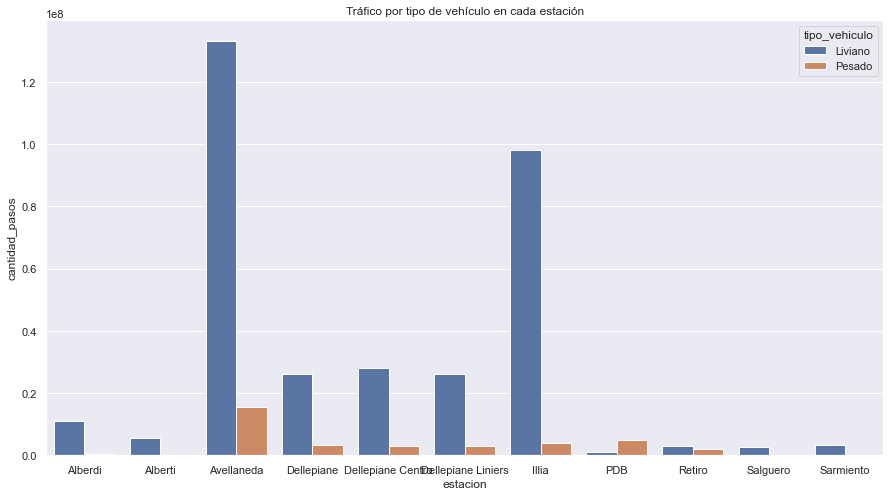

In [13]:
#Volumen de tráfico por estación de peaje
gp1= dataset.groupby(['estacion','tipo_vehiculo'],as_index=False).sum()
plt.figure(figsize=(15,8))
sns.barplot(x='estacion',y='cantidad_pasos', data=gp1, hue='tipo_vehiculo')
plt.title('Tráfico por tipo de vehículo en cada estación')

El siguiente gráfico indica la cantidad de tráfico según el sentido en cada una de las estaciones, donde la mayoría tienen un flujo de tráfico muy parejo en amobos sentidos y para las estaciones de Dellepiane se aprecian dos estaciones solo con flujo en un sentido, lo cual parace indicar que en los años que se registraban dos estaciones de Dellepiane, cada una operaba en un solo sentido  hasta unificarlas y operar en ambos sentidos. Retiro, Salguero y Sarmiento operan solo en sentido hacia la Provincia

Text(0.5, 1.0, 'Tráfico vehicular por estación segun el sentido')

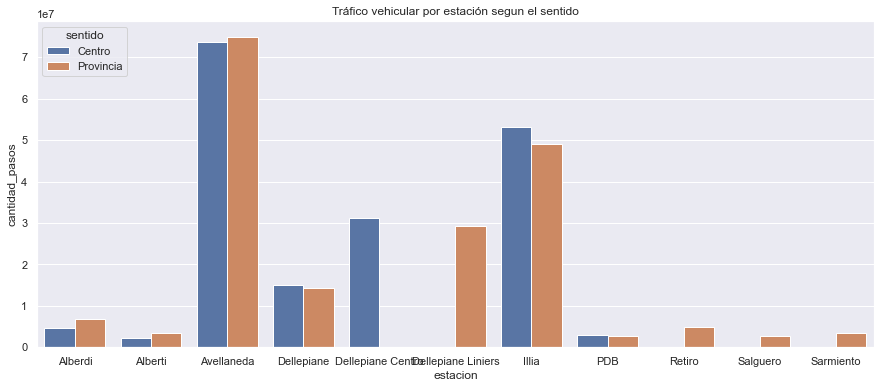

In [14]:
#Volumen de tráfico por sentido y estación
gp2= dataset.groupby(['estacion','sentido'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(x='estacion', y='cantidad_pasos', data=gp2, hue='sentido')
plt.title('Tráfico vehicular por estación segun el sentido')

En cuanto a la forma de pago en las diferentes estaciones por año, se puede observar cómo ha ido disminuyendo el año a año la forma de pago en efectivo mientras que aumenta la forma de pago con Telepase, con lo cual podríamos afirmar que en los tres años analizados las estaciones de servicio han venido impulsando el pago con telepase y desincentivando la forma de pago en efectivo.

Text(0.5, 1.0, 'Distribución de la forma de pago por año')

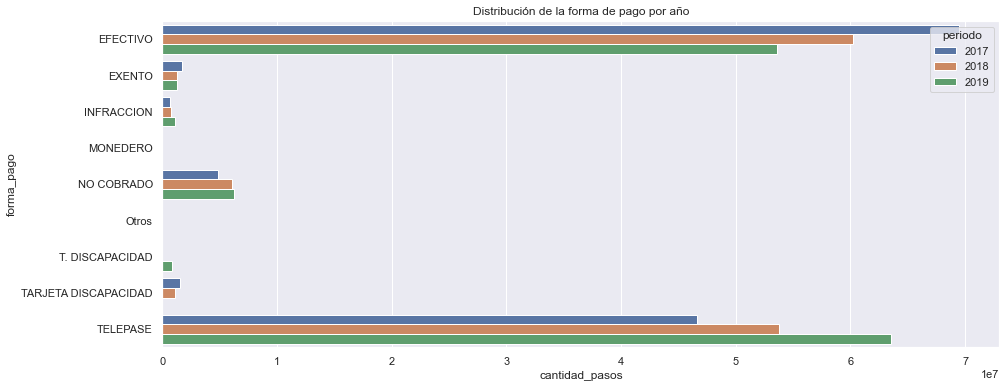

In [15]:
#Volúmen de pasos por forma de pago
gp3= dataset.groupby(['forma_pago','periodo'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(y='forma_pago', x='cantidad_pasos', data=gp3, orient='h', hue='periodo')
plt.title('Distribución de la forma de pago por año')

Hasta este punto revisamos como se distribuyen las variables entre sí. Ahora analicemos cómo se comporta el tráfico en el tiempo. 

A continuación se aprecia el flujo vehicular acumulado cada año en cada una de las estaciones, el resultado más relevante pareciera ser la disminución en el tráfico que ha venido presentando Avellaneda mientras que Illia mantiene su flujo vehicular, siendo estas dos estaciones las de mayor concurrencia de tráfico.

Text(0.5, 1.0, 'Flujo vehicular acumulado en cada estación/año')

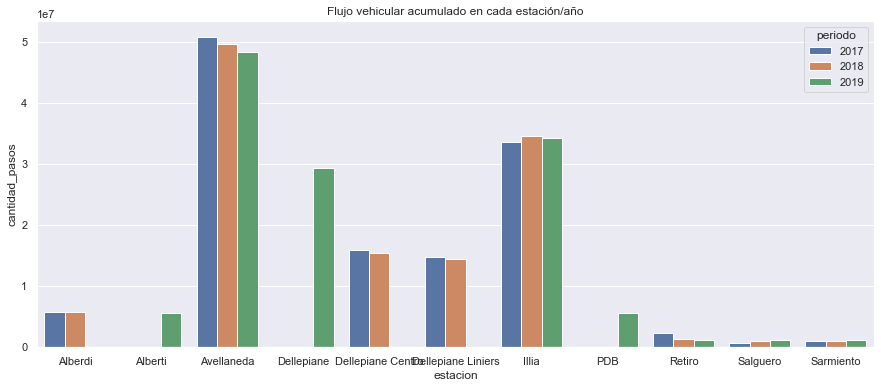

In [16]:
#Volumen de tráfico en las estaciones por año
gp4= dataset.groupby(['estacion','periodo'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(x='estacion', y='cantidad_pasos', data=gp4, hue='periodo')
plt.title('Flujo vehicular acumulado en cada estación/año')

Dado que el trabajo se realizará sobre la estación Illia, continuaremos explorando el comportamiento del tráfico vehicular sólo para la estación Illia. El siguiente gráfico nos muestra el volúmen del flujo vehicular en la estación Illia según el día de la semana, donde el sábado y el domingo son los días de la semana con menor flujo vehicular pero no por ello menos importante ya que el flujo vehicular sigue siendo importante.

Text(0.5, 1.0, 'Flujo vehícular en Illia por día de la semana')

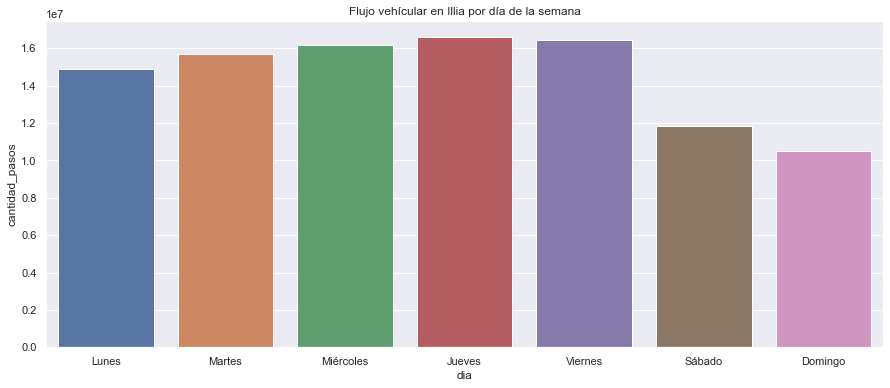

In [17]:
#Volumen de tráfico promedio en la estación Illia por día de la semana
gp4= dataset.groupby(['estacion','dia'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(x='dia', y='cantidad_pasos', data=gp4[gp4['estacion']=='Illia'], order=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.title('Flujo vehícular en Illia por día de la semana')

Buscando un poco más de granularidad, a continuación se aprecia el flujo vehicular según la hora del día en la estación Illia.
Del mismo se puede concluir que la estación tiene una actividad vehicular importante entre las 6 a.m y las 9 p.m, siendo la hora pico en la mañana la franja horaria de las 8 a.m y en las tarde la franja horaria de las 5 y 6 p.m. tendiendo a ser estas dos últimas las de mayor frecuencia vehicular en el día.

Text(0.5, 1.0, 'Flujo vehicular acumulado por hora en la estación Illia')

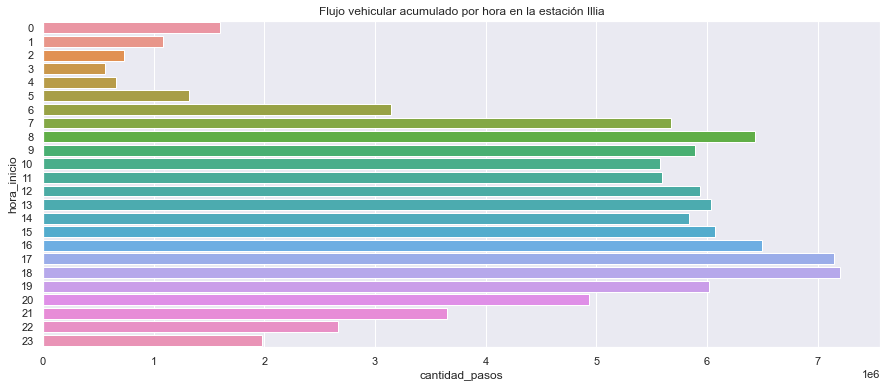

In [18]:
#Volumen de tráfico promedio en la estación Illia por hora del día
gp5= dataset.groupby(['estacion','hora_inicio'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(x='cantidad_pasos', y='hora_inicio', data=gp5[gp5['estacion']=='Illia'],orient='h')
plt.title('Flujo vehicular acumulado por hora en la estación Illia')

Para finalizar este análisis exploratorio de datos, se presenta la distribución de la forma de pago por año para la estación Illia cuyo resultado es muy similar al visto anteriormente para el consolidado de todas las estaciones, es decir, la forma de pago en efectivo ha venido decreciendo mientras que el pago con telepase está adquiriendo mayor importancia.
Es importante tener en cuenta este aspecto ya que la serie de tiempos que se estudiará será para la estación Illia con forma de pago en efectivo, la cual al estár decayendo podría ser un factor que afecte la efectividad de los modelos para la predicción del flujo vehicular, podría ser más interesante un modelo predictivo basado en la forma de pago telepase que viene creciendo.

Text(0.5, 1.0, 'Distribución de la forma de pago en Illia/año')

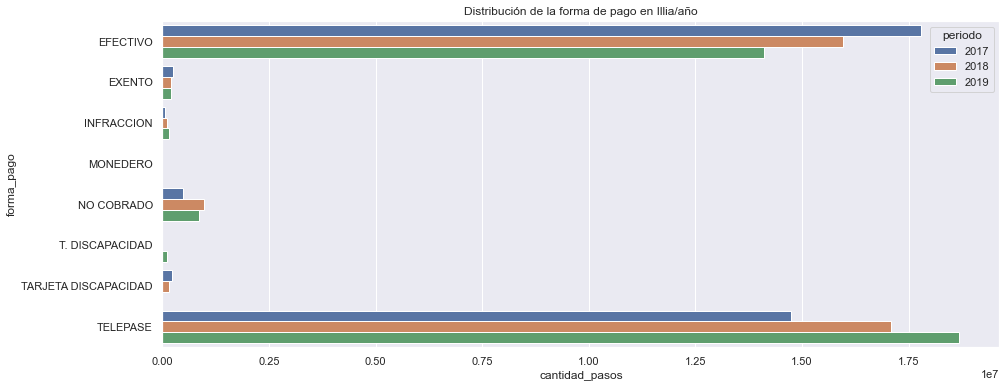

In [19]:
#Volúmen de pasos por forma de pago por año en Illia
gp6= dataset.groupby(['estacion','forma_pago','periodo'],as_index=False).sum()
plt.figure(figsize=(15,6))
sns.barplot(y='forma_pago', x='cantidad_pasos', data=gp6[gp6['estacion']=='Illia'], orient='h', hue='periodo')
plt.title('Distribución de la forma de pago en Illia/año')

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**, por lo cual se filtra el dataset para trabajar sólo con esta información.

In [20]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


Acotinuación se cambia el formato del campo fecha a datetime (aaaa-mm-dd-hh-mm-ss) concatenando los campos fecha y hora_fin previamente formateados y se eliminan las columnas iniciales para dejar un solo campo

In [21]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [22]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


Las siguientes dos líneas de código organizaran el dataset de forma ascendete (notar que se tiene una granularidad de una hora en la serie) y se grafica la serie

In [23]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


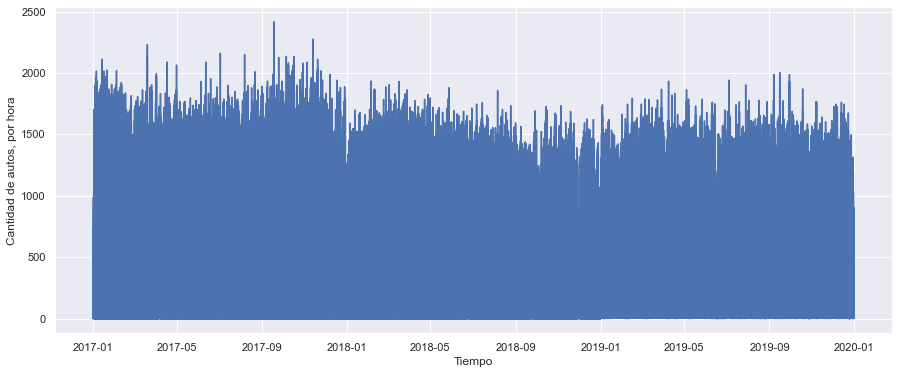

In [24]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

El gráfico anterior muestra la serie de la cantidad de autos que pasan cada hora por la estación de Illia y que pagaron en efectivo, sin embargo, la serie se ve muy saturada y no permite la visualización de valores atípicos. Por lo tanto, en el siguiente gráfico se hará un resampleo de la serie de manera diaria

In [25]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


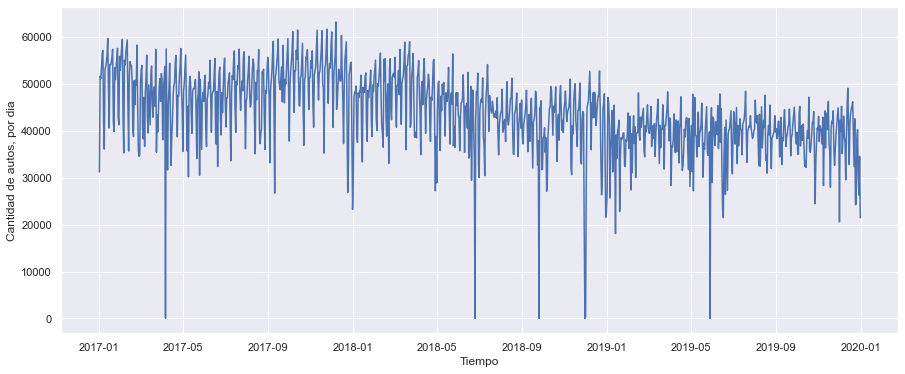

In [26]:
#serie por hora del tráfico vehicular en Illia
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

El gráfico anterior de la serie por día es un poco más claro respecto a la serie por semana y permite la identificación de por lo menos cinco valores atípicos. 
También se aprecia para cada periodo anual una leve caída en el flujo vehicular de la serie, lo cual está relacionado con el decrecimiento de la forma de pago en efectivo y el incremento en la forma de pago telepase.

Aunque se hará un tercer resampleo semanal de la serie, primero se revisaran estos valores atípicos que simple vista parecieran ser las observaciones menores a 18.000 autos por hora

In [27]:
#Valores atípicos de la serie diaria  para la estación Illia
out_diario= diario[diario.cantidad_pasos<18000]
out_diario

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


Se tenía la intención de revisar la distribución de estos valores atípicos por hora pero se concluye que no tiene sentido ya que de los seis días identificados con valores atípicos, cuatro de ello no tienen datos por lo cual las 24 horas también tendrán un valor cero y por la baja cantidad de datos de los otros dos días, se espera que la mayor parte del día tenga también valores cero.

A continuación se hará el resampleo de la serie de manera semanal para observa la distribución de la serie y el comportamiento de los anteriores valores atípicos

In [28]:
#Resampleamos nuestros datos para agrupar por semana
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.tail()

(158, 1)


,cantidad_pasos
fecha,
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881
2019-12-29,226390
2020-01-05,55970


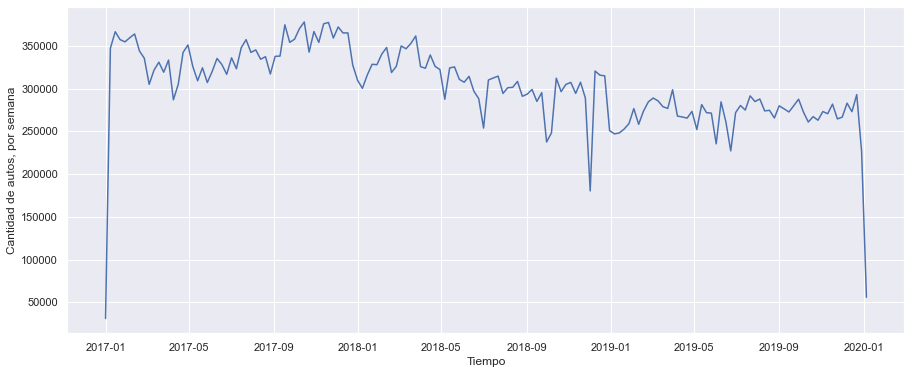

In [29]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.show()

La serie semanal tiene visualmente una presentación menos saturada pero con la deventaja de contar sólo con 158 observaciones (semanas) que son pocos datos para  el entrenamiento de un modelo predictivo. Adicionalmente, se puede apreciar cómo la primer y última semana serían datos atípicos para la serie, por lo cual si se trabajara con esta seria podrían ser eliminadas o aplicarseles alguna técnica de imputación de datos para reducir su impacto sobre la serie.

Basados en la visualización de las tres series anteriores, se decide que lo mejor es trabajar con una serie diaria ya que nos ofrece una cantidad suficiente de datos para el entrenamiento de un modelo de serie de tiempos y su comprensión visual es aceptable. Para ello, realizaremos primero el tratamiento de los seis valores atípicos identificados de manera previa.

## Serie de tiempo diaria

Volvemos a la serie de tiempo con una granularidad diaria, donde se idetificaron seis días como valores atípicos los cuales trataremos más adelante, pues aún nos falta identificar si tenemos valores faltantes.
Puede haber dos tipos de valores faltantes:
1. Días sin valores, las cuales no necesariamente se van a identificar como valores nulos sino también como valores cero (o sea, no tiene datos) la cual ya las identificamos dentro de los valores atípicos.
2. Días faltantes, es decir, tener un salto de dos o mas días en la serie de tiempo.

A continuación identificaremos si en los datos faltan días, aunque con las 1095 días disponibles pareciera no tener días faltantes en los tres años

In [30]:
diario.reset_index(inplace=True)
diario.tail()

,fecha,cantidad_pasos
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523
1094,2019-12-31,21447


In [31]:
#Calculamos la diferencia de una semana a la anterior, el GAP optenido debería ser el mismo para todas las semanas
# a menos que se tengan semanas faltantes
diario.index.dtype
diario['date_check'] = diario.fecha.diff()
diario.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

El resultado anterior indica que no hay días faltantes de los datos diarios de flujo vehícular.Por último y como validación final de valores faltantes se buscará sin hay registros de días con valores faltantes

In [32]:
#Busqueda de dias con valores nulos o faltantes
diario.cantidad_pasos.isna().sum()

0

Ahora se tratarán los datos atípicos identificados anteriormente mediante la funcion interpolate, ya que no los podemos borrar porque nos quedarían huecos en los días de la serie, en primer lugar los volvemos valores nulos y luego les imputamos los valores interpolando los valores restantes.

In [33]:
#Conversión a nulos de los valores atípicos
diario.cantidad_pasos[diario.cantidad_pasos<18000] = np.nan

<ipython-input-33-7771cdbb00fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario.cantidad_pasos[diario.cantidad_pasos<18000] = np.nan


In [34]:
#Inputación de datos a los valores atípicos
print(diario.isna().sum())
diario = diario.interpolate(method='pad')
print(diario.isna().sum())

fecha             0
cantidad_pasos    6
date_check        1
dtype: int64
fecha             0
cantidad_pasos    0
date_check        1
dtype: int64


En cuanto a la tendencia y estacionalidad de la serie de tiempo diaria, se aprecia una tendencia decreciente ya que como se apreciaba en el análisis exploratorio de datos, los pagos en efectivo tienen una tendencia decreciente en los tres años analizados y respecto a la estacionalidad no es muy claro aún qué tipo de estacionalidad presenta la serie pero basados en el análisis exploratorio de datos se podría pensar que presenta una estacionalidad diaria ya que los fines de semana presentan menor tráfico que los días de la semana.

## Componentes de la Serie

A continuación se analizará la tendencia, estacionalidad y ruido de la serie mediante la media movil y mediante una regresión lineal de la serie.

**Tendencia media móvil**

Como ventana de tiempo se tomará cuatro meses, es decir, 120 días aproximadamente

In [35]:
#Rolling window de cuatro meses
ventana = int(30*4)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia.index= diario.fecha
diario_promedio_tendencia.shape

(1095,)

In [36]:
#Nuevamente se convierte la fecha del dataset en el index
diario.index= diario.fecha

A continuación se grafica la tendencia basado en la media móvil de 120 días

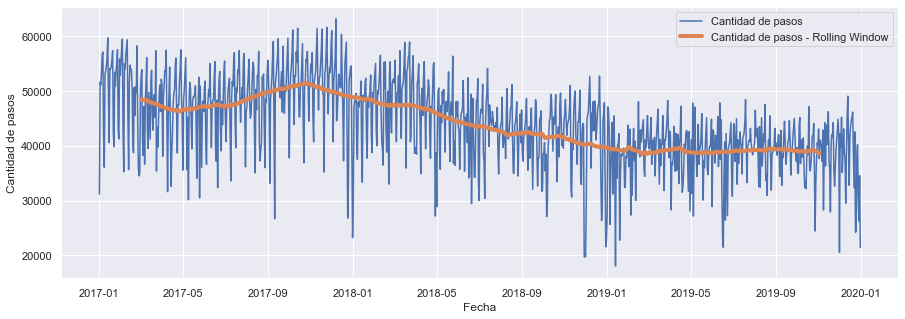

In [37]:
#Tendencia con media móvil
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

En el gráfico anterior se aprecia durante el primer año una leve tendencia creciente pero durante el 2018 y 2019 adquiere una tendencia decreciente como se había mencionado anteriormente.

**Tendencia Lineal**

Ajustamos la series de tiempo diaria a una regresión lineal.

Para comenzar, lo único que tenemos que tener en cuenta es que no podemos ajustar una regresión lineal con las fechas así como las tenemos, por lo que tenemos que pasarlas a un formato numérico.

In [38]:
#fecha a valores ordinarios
diario['fecha_numeros']=diario.fecha.map(datetime.datetime.toordinal)
diario.head()

,fecha,cantidad_pasos,date_check,fecha_numeros
fecha,,,,
2017-01-01,2017-01-01,31183.0,NaT,736330
2017-01-02,2017-01-02,51568.0,1 days,736331
2017-01-03,2017-01-03,51093.0,1 days,736332
2017-01-04,2017-01-04,53332.0,1 days,736333
2017-01-05,2017-01-05,56486.0,1 days,736334


In [39]:
#Molode lode regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

Ahora se presenta la tendencia de la serie de tiempo calculada mediante la regresión lineal

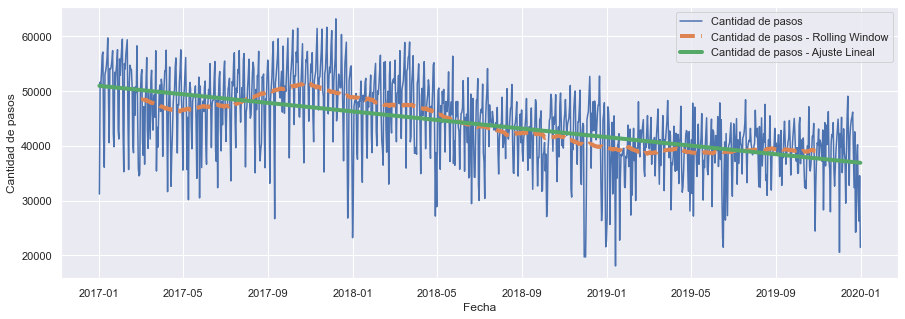

In [40]:
#Tendencia con regresión lineal
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Nuevamente se comprueba que la siere de tiempos tiene una tendencia decreciente. El gráfico anterior retoma la tendencia con la media movil (línea punteada) en la cual se aprecia que tiene mejor ajuste al comportamiento de la serie respecto a la tendencia lineal.

Falta obtener las restantes componentes para lo cual se restará a la serie original la tendencia basados en el método de la media móvil. 

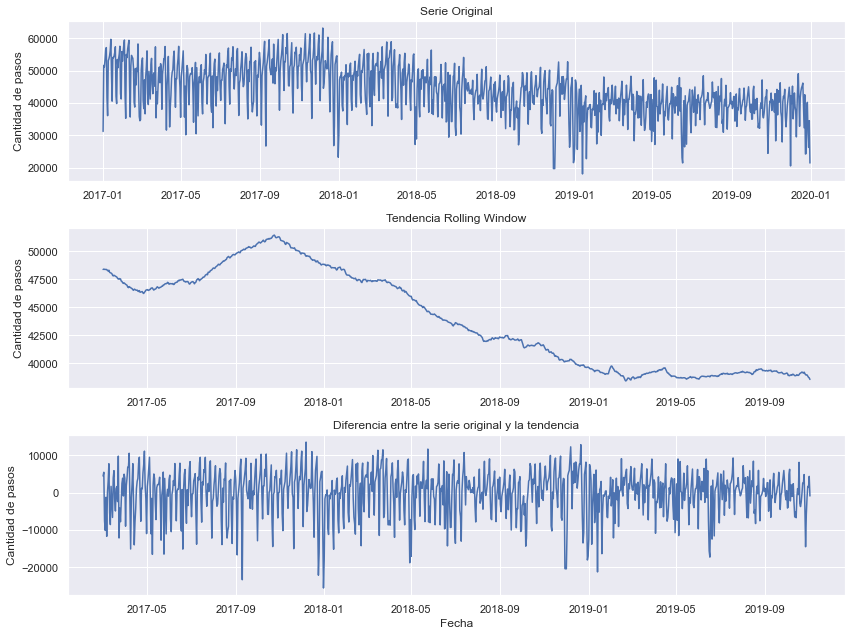

In [41]:
#Gráfico de las demás componentes de la serie
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario.index, diario.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario.index, diario.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()


Para interpretar la estacionalidad de esta serie, nos ubicamos sobre la línea de tendencia en la cual incialmente el tráfico promedio es de 46.000 vehículos pero por su tendencia decreciente finaliza con un tráfico promedio de 38.000 vehículos con pago en efectivo y durante los días con mayor tráfico presenta una componenete estacional de cerca de 10.000 vehículos mientras que los fines de semana la componente estacional oscila en un descenson de 10.000 vehículos en promedio con pago en efectivo.

Por último, revisemos las componentes de la series con statmodels

In [42]:
#Tendencia y estacionalidad con statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')
#result.plot()

In [43]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Name: trend, Length: 1095, dtype: float64

In [44]:
result.seasonal

fecha
2017-01-01   -6962.291023
2017-01-02   -1106.491945
2017-01-03     143.238009
2017-01-04    1982.512155
2017-01-05    3208.296954
                 ...     
2019-12-27    5218.880287
2019-12-28   -2484.144438
2019-12-29   -6962.291023
2019-12-30   -1106.491945
2019-12-31     143.238009
Name: seasonal, Length: 1095, dtype: float64

A continuación se grafica nuevamente la serie de tiempo original, la tendencia y la estacionalidad de la serie pero calculada esta vez con la librería statsmodel

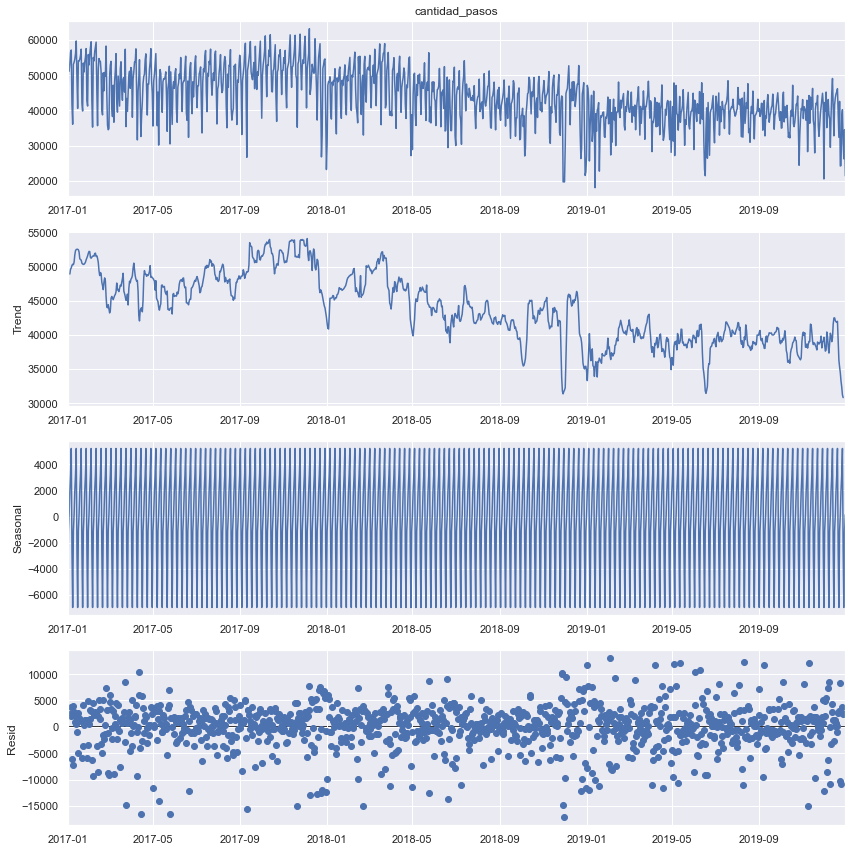

In [45]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

En el gráfico anterior se aprecia que la statsmodel toma una ventana de tiempo de tres días para calcular la tendencia y estacionalidad, con la cual nuevamente se obtiene una tendencia decreciente y muy similar a la descrita anteriormente mientras que la estacionalidad si presenta una pequeña variación pero mejor definida con una estacionalidad promedio de 5.000 vehículos mas en los días de mayor flujo vehicular y de 7.000 vehículos menos en los días de menor afluencia vehicular.

Por último, el siguiente histograma muestra la distribución de los residuos al rededor de la media.

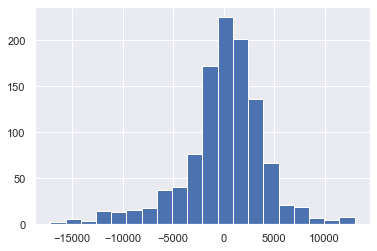

In [46]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

Del histograma anterior y del diagrama de dispersión se concluye que el ruido de la serie aunque no tiene una distribución simétrica, se distribuyen al rededor de la media de forma aceptable.

# 2. Forecasting o  Predicción a Futuro

Visualicemos nuevamente nuestra serie de tiempo original (claro está, luego del resampleo y tratamiento de valores atípicos)

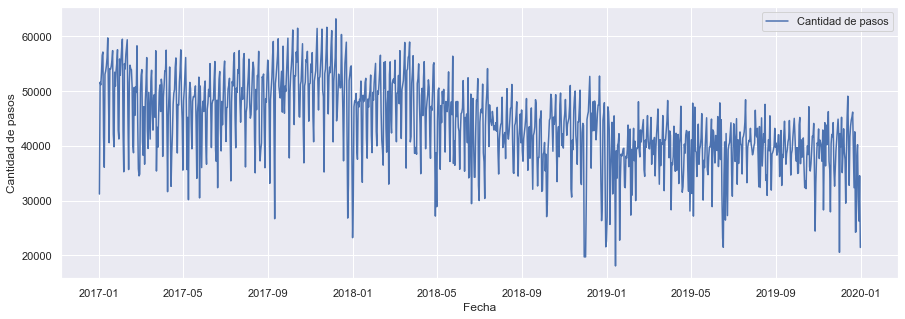

In [47]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

## Autocorrelación

Ahora vamos a analizar la correlación de esta serie de tiempo utilizando la librería statsmodels.
El número de lags lo tomaremos en función de la ventana utilizada en el cálculo de las componentes de la serie y de la data disponible, es decir, dado que la venta utilizada fue de cuatro meses y que tenemos información de 3 años y los datos son diarios, entonces tendremos un lag de 120*3*3=1.080 días


In [48]:
#Cálculo de la autocorrelación de los datos de la serie de tiempos
from statsmodels.tsa.stattools import acf

nlags =  120*3*3
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\JCHAVERR\Anaconda3\envs\acamica\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [49]:
#tamaño de la autocorrelación
autocorr.shape

(1081,)

Text(0.5, 0, 'lag')

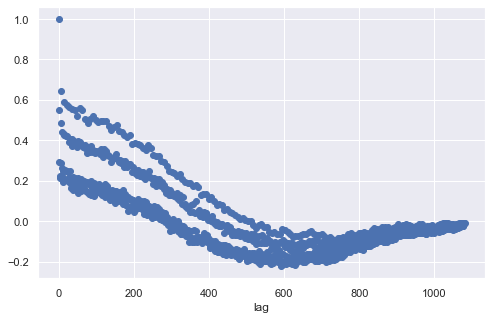

In [50]:
#graficamos la autocorrelación de la serie
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

En el gráfico anterior se aprecia como los lags de la serie de tiempo muestran poca correlación entre sí, lo cual se debe en primer lugar al comprotamiento decreciente de la serie original, pero a su vez, recordemos que durante el primer año de análisis la serie tiene una leve tendencia creciente y luego los últimos dos años una tendencia decreciente.

El resultado anterior se debe principalmente a la tendencia decreciente de la serie por lo que nos costó  detectar algún tipo de estacionalidad en la misma ya que las series con tendencia no nula generalmente son procesos no estacionarios. 

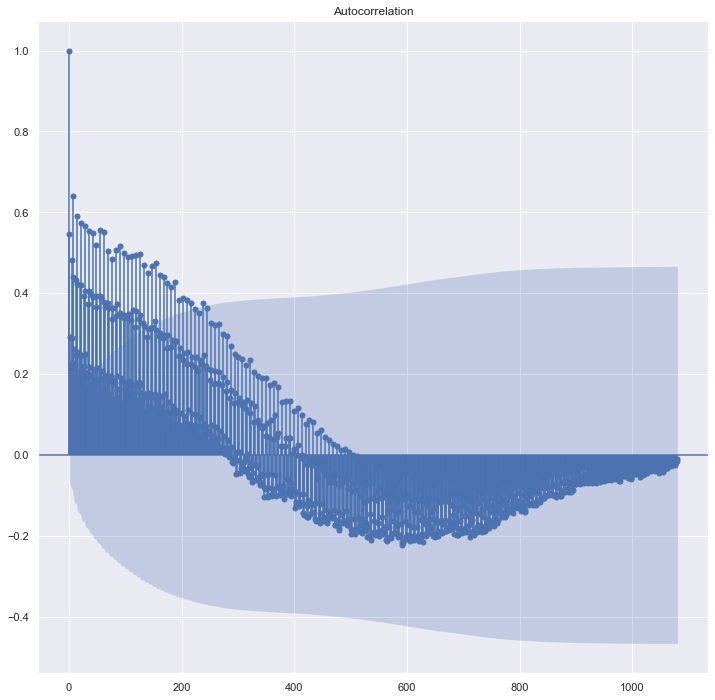

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 120*3*3)
plt.show()

De acuerdo al gráfico anterior, no es muy clarocada cuanto se completa los ciclos estacionales de la serie, pero pareciera que intetara hacerlo cada 600 días en promedio, es decir, cada dos años aproximadamente.

### Look_back, Train y Test

Ahora preparemos la serie de tiempo para desarrollar los modelos de predicción, para esto vamos a necesitar definir nuestro look_back para cada predección así como los conjuntos de datos de entrenamiento y de validación.

In [52]:
#Datos de la serie de tiempos diaria
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Name: cantidad_pasos, dtype: float64

En primer lugar, se definen los valores que se tomaran hacia atras (dos meses).

In [53]:
#Definición del look_back para predecier los valores siguientes
look_back = 60 # usamos dos meses (60 días) de datos para predecir el valor siguiente

Creamos los `X` e `y` con ceros para luego llenar con los datos.

In [54]:
#Definición de los datos de entrenamiento y la variable objetivo
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1034, 60) (1034,)


Llenamos los `X` e `y`

In [55]:
#Llenado con los datos de la serie de las variables de entrenamiento y la variable objetivo
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [56]:
print(X)

[[31183. 51568. 51093. ... 34497. 34825. 49891.]
 [51568. 51093. 53332. ... 34825. 49891. 52832.]
 [51093. 53332. 56486. ... 49891. 52832. 53876.]
 ...
 [37630. 40527. 40159. ... 24349. 38168. 40182.]
 [40527. 40159. 43053. ... 38168. 40182. 30681.]
 [40159. 43053. 37655. ... 40182. 30681. 26259.]]


In [57]:
print(y)

[52832. 53876. 40755. ... 30681. 26259. 34523.]


Es importante notar que el tiempo de la medición - fecha - ya no es parte de los datos.

Hacemos el **train/test split**. No se utiliza la función que se utilizaba en los modelos de machine learning ya que como es una serie de tiempo, los datos ya no pueden ser aleatorios sino que deben ser continuos en el tiempo

In [58]:
#Preparación de los datos de entrenamiento y de validación
N_train = 690 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 344 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(630, 60) (630,)
(344, 60) (344,)


### Modelo DecisionTreeRegressor

Vamos a entrenar un `Árbol de decisión` para predecir el siguiente valor en la serie de tiempo diaria del flujo vehicular.

In [59]:
#Librerias de regresión mediante árbol de decisión y entrenamiento del modelo
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=10, random_state=42,).fit(X_train,y_train)

Graficamos la importancia de cada feature.

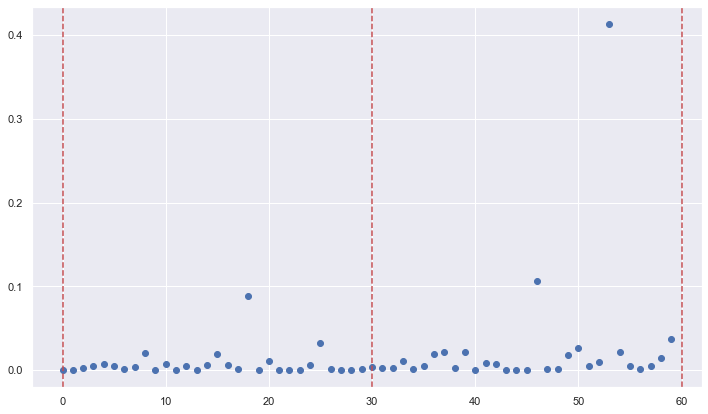

In [60]:
#Importancia de cada feature del modelo de regresión
plt.figure(figsize = (12,7))
plt.scatter(np.arange(dtr.feature_importances_.size),dtr.feature_importances_)
for x in np.arange(3)*30:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Teniendo en cuenta que nos encontramos frente a una serie con una granularidad diaria, el gráfico anterior está separado por semanas en el cual al parecer, el modelo le da más importancia a los primeros días de la semana.

Ahora vamos a utilizar el modelo para predecir el flujo vehicular.

In [61]:
#Predicción del flujo vehicular mediante regresión de árbol de decisión
y_pred = dtr.predict(X)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

Ahora se grafica el resultado de las predicciones sobre los datos de entrenamiento y los datos de validación.

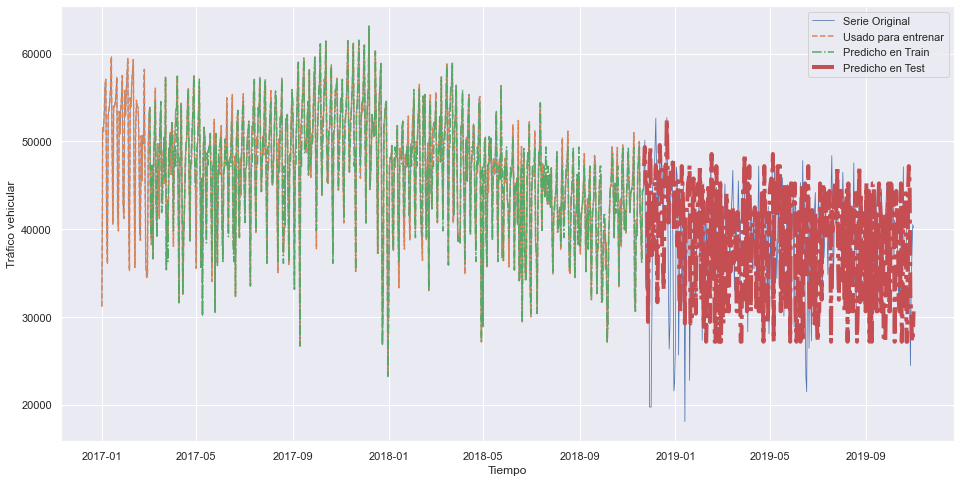

In [62]:
#Gráfico de las predicciones
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tráfico vehicular')
plt.show()

En el resultado anterior, las predicciones sobre los datos de entrenamiento parecen ajustarse perfectamente a la serie original mientras que las predicciones sobre los datos de validación presentan mayores errores en las predicciones.

Vamos a utilizar como métrica de evaluación del modelo el RMSE en train y test con el fin de obtener el error de modelo en los mismos términos del objetivo, la predicción de unidades vehiculares que pagan en efectivo en la estación Illia.

In [63]:
#Raiz del Erro Cuadrático Medio
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1765.5962518341905
Error en Test: 8735.04279455239


Como se había anunciado anteriormente, las predicciones sobre los datos de entrenamiento mostraban un ajuste muy bueno y se obtuvo un error promedio de 1.766 autos en las predicciones y sobre la predicción de los datos de validación se obtiene un error promedio de 8.735 vehículos por día. 

Este modelo será utilizado como el modelo benchmark para seleccionar y optimizar un mejor modelo.

### Modelo RandomForestRegressor

Nuestro segundo modelo será un `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo diaria del flujo vehicular que paga en efectivo en la estación Illia. Continuamos utilizando los conjuntos de datos y las definiciones del modelo anterior

In [64]:
#Entrenamiento de un modelo de bosque aleatorio de regresión
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs = 4).fit(X_train,y_train)

Se grafica la importancia de cada feature para este modelo.

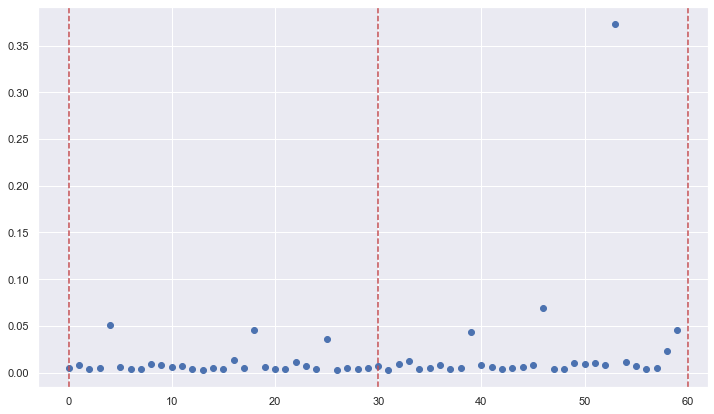

In [65]:
#Importancia de los features para el bosque de regresión
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(3)*30:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

El gráfico de importancia de los features del este modelo es muy similar al del modelo anterior y al parecer le da más importancia a los días de la semana que es donde se presenta mayor tráfico de vehículos y si nuestra interpretación no falla, el día de mayor importancia es el viernes para este modelo.

Ahora vamos a predecir con este modelo

In [66]:
#Predicciones con RandomForestRegressor
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Nuevamente se grafica el resultado de las predicciones sobre la serie original donde se aprecia un buen ajuste en la predicción de los datos de entrenamiento con algo de error y en la predicción de los datos de validación el ajuste si es muy pobre y por lo tanto el se espera obtener un RMSE alto en la predicción del flujo vehicular.

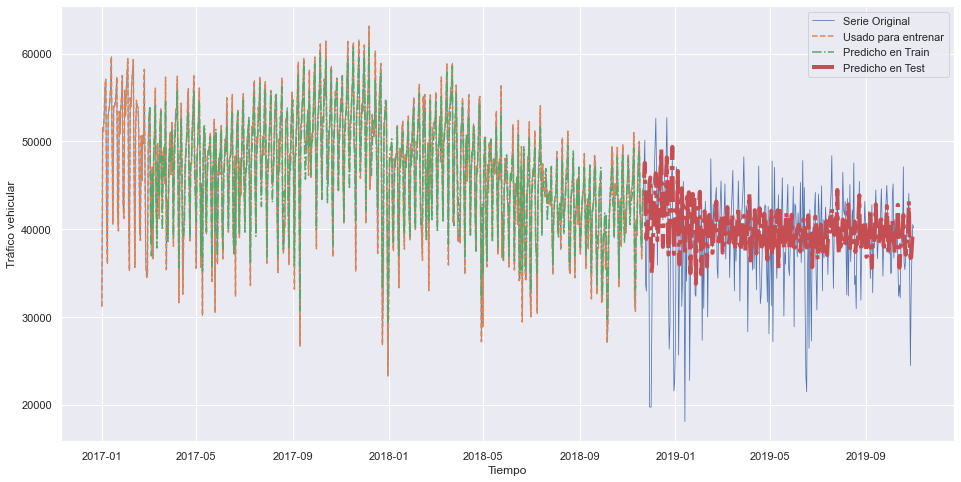

In [67]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tráfico vehicular')
plt.show()

Calculamos el error RMSE en train y test, donde se aprecia lo mencionado en el gráfico anterior, para las predicciones de los datos de validación se obtiene un error mucho mayor respecto al erro de los datos de entrenamiento, por lo cual, el modelo sufre de un poco de overfitting.

In [68]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1869.210147923489
Error en Test: 5525.088909119029


Respecto a nuestos modelo benchmark, este modelo tiene un retroceso leve en la predicción sobre los datos de entrenamiento, mientras que las predicciones sobre los datos de validación el error es menor respecto al modelo benchmark de regresión lineal simple, aunque a simple vista se esperaba un resultado peor.

### Modelo XGBoost

Por último, entrenaremos un modelo `XGBoost` para predecir el siguiente valor en la serie de tiempo diaria del flujo vehicular que paga en efectivo en la estación Illia.

In [69]:
#Carga de las librerias de XGBoost
import xgboost as xgb
from xgboost import XGBRegressor

In [70]:
#Entrenamiento de un modelo XGBoost de regresión
xg = XGBRegressor(n_estimators=100, max_depth=10, random_state=42, eta=0.1).fit(X_train,y_train)

Se grafica la importancia de cada feature para este modelo.

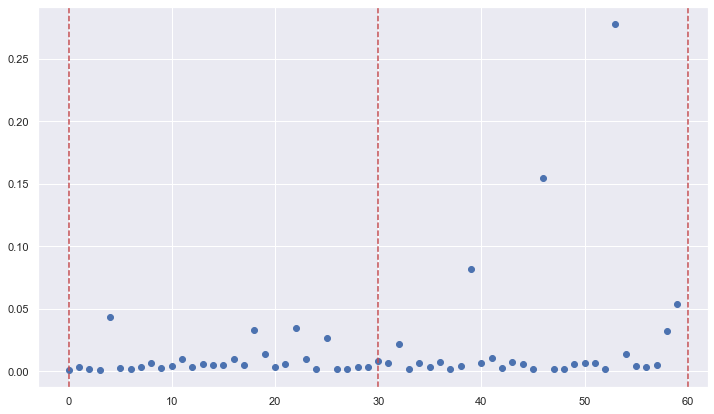

In [71]:
#Importancia de los features para el bosque de regresión
plt.figure(figsize = (12,7))
plt.scatter(np.arange(xg.feature_importances_.size),xg.feature_importances_)
for x in np.arange(3)*30:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Según el gráfico de importancia de los features en el modelo XGBoostRegressor, los resultados son muy similares al del modelo anterior y al parecer le da más importancia a los días viernes para las predicciones del tráfico de vehículos.

Ahora vamos a predecir con este modelo sobre los datos de entrenamiento y de validación

In [72]:
#Predicciones con XGBoost
y_pred = xg.predict(X)
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)

A continuación se grafica el resultado de las predicciones sobre la serie original donde se aprecia un buen ajuste en la predicción de los datos de entrenamiento con muy poco error y en la predicción de los datos de validación donde el ajuste es mejor al de los modelos anteriores y trata de seguir el comportamiento de la serie, por lo cual se espera obtener un mejor RMSE respecto a los demás modelos.

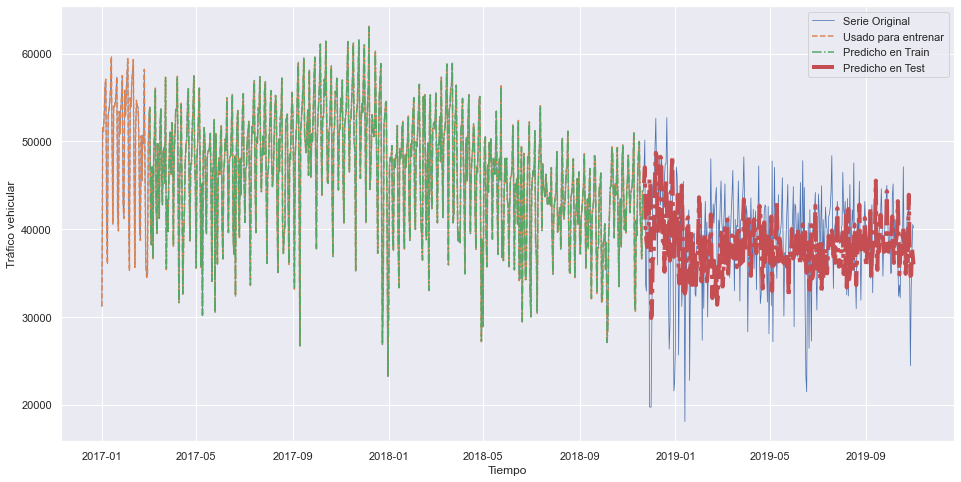

In [73]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tráfico vehicular')
plt.show()

Calculamos el error RMSE en train y test, donde se aprecia lo mencionado en el gráfico anterior, para las predicciones de los datos de validación se obtiene un error mucho mayor respecto al erro de los datos de entrenamiento, por lo cual, el modelo sufre de un poco de overfitting.

In [74]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 44.27109986098812
Error en Test: 5755.189198245815


#### Selección del mejor modelo
Hasta este punto se han evaludao tres modelos:
    1. Modelo de `DecisionTreeRegressor-Modelo Benchamark` en el cual se obtuvo un error sobre la predicción de datos de entrenamiento de 1.766 vehículos y sobre los datos de validación de 8.735 vehículos.
    2. Modelo `RandomForestRegressor` en el cual se obtuvo un error sobre la predicción de datos de entrenamiento de 1869 vehículos y sobre los datos de validación de 5.525 vehículos
    3. Por último, el modelo `XGBosstRegressor` para el cual el error sobre los datos de entrenamiento es de sólo 44 vehículos y el error sobre los datos de validación es de 5.755.
    
Como se puede observan en los resultados anteriores, los dos últimos modelos logran obtener mejores resultados respecto al modelo benchmark y entre los modelos RandomForest y XGBoost se obtienen resultados muy similares sobre los datos de validación y logra ser mejor el XGBoost sobre los datos de entrenamiento (aunque posiblemente esté sufriendo de overfitting). Por lo tanto, en base a estos resultados se decide seleccionar como mejor modelo el XGBoost el cual se obtimizarán sus parámetros mediante el método de GridSearch.

### Optimización de parámetros XGBoost

Como ya se mencionó, la optimización se hará mediante la aplicación de GridSearch y posteriormete se hara la validación cruzada del modelo.

In [75]:
#Importamos las librerías requeridas
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [76]:
#Modelo estimador
xg_op = XGBRegressor()

En la línea anterior cargamos nuevamente un modelo de XGBoost el cuál será el modelo a optimizar y en la siguiente línea se cargan los parámetros entre los cuales se buscará la combinación óptima de las mismas, pero previo a esto se hizo un preprocesamiento acotando el número de estimadores entre 10 y 100 (de 10 en 10) para optimizar el tiempo de procesamiento, con el resultado 80 estimadores como valor óptimo, con esto se seleccionó el rango entre 70-90 estimadores para optener nuevamente el número óptimo de estimadores final.

In [77]:
#Parrila de parámetros a revisar por el gridsearch
param_grid = {'max_depth': np.arange(2,20),
              'n_estimators':np.arange(70,90),
              'random_state':[42],
              'eta':[0.1,0.001,0.01]}

In [78]:
# Grid Search
model_op = GridSearchCV(xg_op, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

# Entrenamos: el modelo con la grilla definida arriba y CV con tamaño de Fold=5
model_op.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             param_grid={'eta': [0.1, 0.001, 0.01],
                         'max_de

A continuación extraemos de la optimización los mejores parámetros del modelo, con los cuales se hará nuevamente el entrenamiento y las predicciónes del flujo de vehículos. De los resultados se observa que el modelo óptimo cotiene 82 estimadores con una profundidad de 2 y una rata de aprendizaje de 0.1

In [79]:
print("Mejores parametros: "+str(model_op.best_params_))
print("Mejor Score: "+str(model_op.best_score_)+'\n')

score=model_op.cv_results_['mean_train_score']
score

Mejores parametros: {'eta': 0.1, 'max_depth': 2, 'n_estimators': 82, 'random_state': 42}
Mejor Score: -21822900.172016256



array([-9.80471618e+06, -9.75460230e+06, -9.67307756e+06, ...,
       -4.05303329e+08, -3.97584032e+08, -3.90012962e+08])

In [80]:
#Convertimos el score a RMSE
RMSE= np.round(np.sqrt(-score), 2)
RMSE

array([ 3131.25,  3123.24,  3110.16, ..., 20132.15, 19939.51, 19748.75])

La optimización mediante GridSearch y validación cruzada indican que el mejor resultao arroja un RMSE sobre el set de entrenamiento de 3.123 vehículos. Ahora probemos el modelos sobre el set de test

In [81]:
#Predecimos en los datos de test
prediction_op = model_op.predict(X_test)

In [82]:
rmse_test_op= np.sqrt(mean_squared_error(y_test, prediction_op))
rmse_test_op

5683.258787664366

El RMSE para el ensamble optimizado sobre el set de test es de 5.683 vehículos. Aunque la métrica obtenida para el conjunto de entrenamiento no mejora respecto al modelo inicial, para el conjunto de prueba o validación el error si mejora, resultados que vemos favorables ya que este modelo pareciera no tener overfitting y mejora su desempeño en la predicción de datos desconocidos.

### Validación Cruzada para el modelo XGBoost

A continuación se aplica la validación cruzada para el modelo XGBoost pero sólo con fines didacticos, pues no recomendamos fiarnos de dichos resultados toda vez que este método de validación cruzada selecciona los folds de manera aleatorio y en series de tiempo es importante la secuencia en el tiempo por factores como la tendencia que influyen significativamente en el pronóstico de los siguientes resultados en el tiempo.

In [83]:
from sklearn.model_selection import cross_validate

In [84]:
#Validación cruzada del ensamble del arbol regresor con los parámetros optimizados
xg_fin = XGBRegressor(n_estimators=82, max_depth=2, random_state=42, eta=0.1)
xg_fin_scores = cross_validate(xg_fin, X, y, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
print(xg_fin_scores)

{'fit_time': array([0.16316652, 0.20432758, 0.22157264, 0.21839786, 0.21022725]), 'score_time': array([0.00196719, 0.        , 0.01605225, 0.        , 0.00098252]), 'test_score': array([-22958588.19523348, -25845192.59835697, -18624378.10556826,
       -34390968.39296661, -22706892.74177551]), 'train_score': array([-13946214.37412875, -13550866.70338358, -14253812.90962732,
       -12438766.33794554, -14219488.90442475])}


Con los resultados de la validación cruzada, procedemos a calcular el valor promedio de la métrica RMSE para comparar el modelo optimizado respecto a los anteriores. El resultado es muy similar al obtenido con el modelo incial

In [85]:
#Calculemos el RMSE promedio para train y test
RMSE_xg_train=np.sqrt(-(xg_fin_scores['train_score'])).mean()
RMSE_xg_test=np.sqrt(-(xg_fin_scores['test_score'])).mean()
print(f'El RMSE_train promedio es de:{RMSE_xg_train}', f'y el RMSE_test promedio es de:{RMSE_xg_test}')

El RMSE_train promedio es de:3697.7545506128386 y el RMSE_test promedio es de:4964.09644702645


### Modelo XGBoost optimizado

A continuación se entrenará y evaluará nuevamente el modelo optimizado con el fin de continuar con la predicción futura de datso

Se crea nuevamente el modelo con los hiperparámetros optimizados anteriormente

In [86]:
#Entrenamiento de un modelo XGBoost de regresión
xg3 = XGBRegressor(n_estimators=82, max_depth=2, random_state=42, eta=0.1).fit(X_train,y_train)

Se grafica la importancia de cada feature para el modelo optimizado en el cual se resalta con más claridad la importancia que le da el modelo a los features y se continua observando la asignación de una mayor importancia a los días viernes.

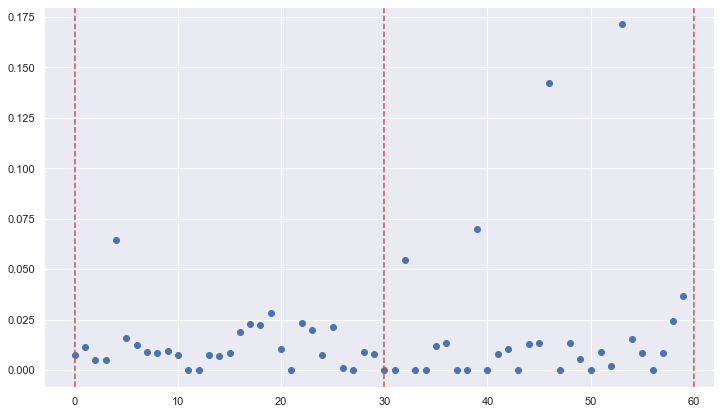

In [87]:
#Importancia de los features para el bosque de regresión
plt.figure(figsize = (12,7))
plt.scatter(np.arange(xg3.feature_importances_.size),xg3.feature_importances_)
for x in np.arange(3)*30:
     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

Ahora vamos a predecir con este modelo sobre los datos de entrenamiento y de validación

In [88]:
#Predicciones con XGBoost optimizado
y_pred = xg3.predict(X)
y_train_pred = xg3.predict(X_train)
y_test_pred = xg3.predict(X_test)

A continuación se grafica el resultado de las predicciones sobre la serie original.

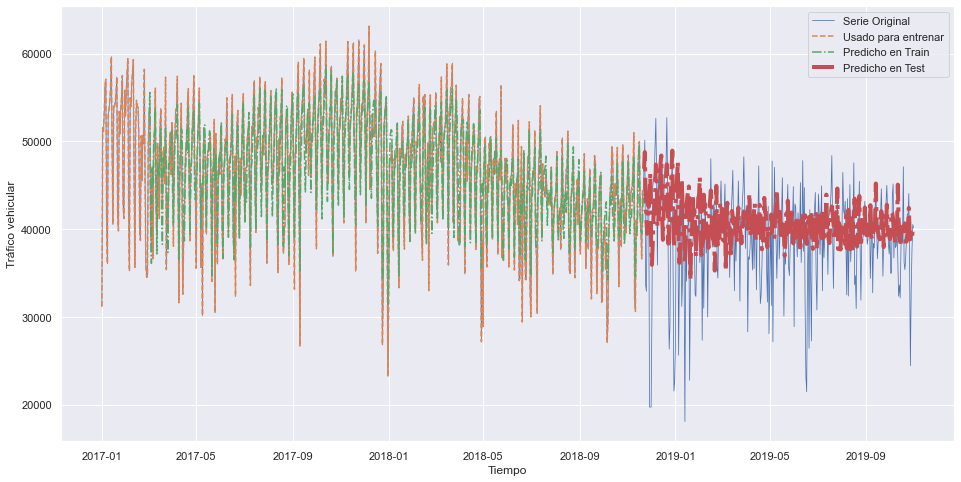

In [89]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tráfico vehicular')
plt.show()

En el gráfico anterior se aprecia un ajuste del modelo en la predicción de los datos de entrenamiento y en los datos de prueba si bien hay errores grandes en las prediccciones por lo menos se aprecial que tranta de seguir la tendencia de la serie original.

De acuerdo a la métrica de evaluación de este modelo, se obtiene un RMSE en train de 3.229 vehículos y en test de 5.683 vehículos sobre las predicciones.

In [90]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 3229.1149700356204
Error en Test: 5683.258787664366


En conclusión, este modelo aunque no presenta mejoras en la metríca de train, por lo menos es más confiable ya que el resultado inicial tiene sobreajuste en la predicción y la métrica sobre las predicciones de los datos de validación si presenta una leve mejora respecto al modelo inicial.

### Predicción del tráfico durante el primer trimestre del año 2020

Ahora se pondrá a prueba el modelo seleccionado con el fin de predecir el tráfico durante el primer trimestre del año 2020. No se predice periodos posteriores al primer trimestre debido a que los resultados podrían tener mucho sesgo toda vez que por ese tiempo se iniciaron las restricciones de movilidad a causa de la pandemia del Covid-19, situación que sin lugar a dudas tuvo que afectar el comportamiento normal en el flujo de vehículos por las estaciones de peaje y la data de entrenamiento no cuenta con información asociada al comportamiento del flujo vehícular en tiempos de pandemias globales.

Lo primero será cargar la información de 2020 y filtar sólo la información que nos interesa del primer trimestres de 2020 para comparar la efectividad de la predicción.

In [91]:
#Cargamos la información del tráfico de 2020
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [92]:
#Se friltra solamente  la estación Illia y la forma de pago Efectivo
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','mes','dia_fecha','observacion'], inplace = True)

In [93]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

In [94]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 

Hata este punto ya tenemos los datos del 2020 en las mismas condiciones que el dataframe con el cual se entrenaron los anteriores modelos

In [95]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Miércoles,Moto,Centro,7.0,2020-01-01
1,Miércoles,Auto,Provincia,423.0,2020-01-01
2,Miércoles,Auto,Centro,467.0,2020-01-01
3,Miércoles,Moto,Provincia,6.0,2020-01-01
4,Miércoles,Pesados 2 Ejes,Centro,1.0,2020-01-01


A continuación llevaremos los datos de 2020 a una granularidad diaria y en la siguiente gráfica se muestra la serie de tiempo para el tráfico en la estación Illia durante el 2020 y que pagaron en efectivo

In [96]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = data_2020.resample('D', on = 'fecha').sum()
print(diario2.shape)

(366, 1)


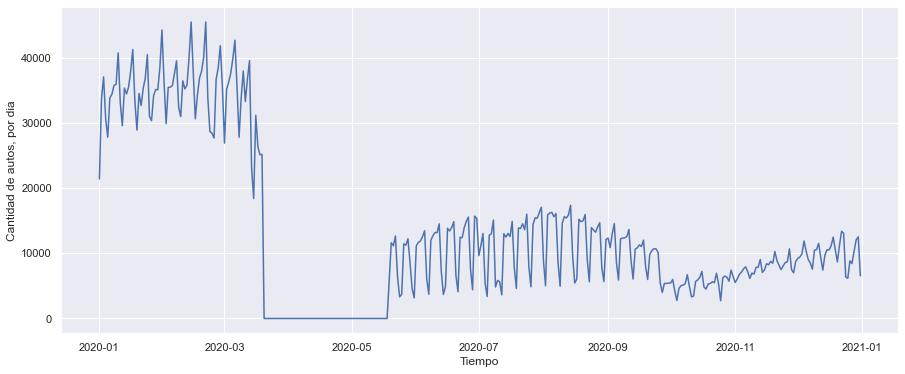

In [97]:
#serie por hora del tráfico vehicular en Illia
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Un dato interesante en el gráfico anterior es que al parecer se había estabilizado la tendencia decreciente que traía el pago en efectivo en dicha estación, estabilización que se empezaba a ver durante el año 2019. Este dato es muy importante ya que nos indica que las ventanas de tiempo que se tomen para predecir los datos de 2020 no deberían ser superiores a un año ya que la tendencia decreciente de los dos primeros años analizados podrían afectar el resultado de las predicciones.

Otro aspecto importante a tener en cuenta durante el 2020 es el descenso en el tráfico a mediados de marzo del 2020 a raíz de la pandemia del coronavirus, periodo en el cual por de las restricciones de movilidad se ve fluctuaciones siginificativas en la serie de tiempo, cambios para los cuales no contamos con datos en escenarios similares para predecir bajo este tipo de situaciones, razón por la cual sólo se hará la predicción para el primer trimestre de 2020.

In [98]:
#Datos de 2020
senial2=diario2.cantidad_pasos

In [99]:
#Concatenamos los datos de 2020 con los datos de 2017, 2018 y 2019
senial3= pd.concat([senial,senial2],ignore_index=False)
senial3

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2020-12-27     8434.0
2020-12-28    10311.0
2020-12-29    12036.0
2020-12-30    12527.0
2020-12-31     6553.0
Name: cantidad_pasos, Length: 1461, dtype: float64

Para la predección del primer trimestre de 2020 se utilizará el **look_back de 60 días**, razón por la cual en la línea anterior unimos los datos desde 2017 hasta 2020 y a continuación definiremos los datos de pronóstico para el primer trimestre de 2020 (hasta el 15 de marzo) y el conjunto de datos reales para evaluar la efectividad del modelo.

Para esto se debe hacer un pequeño ajuste adicional y es filtrar de la serie de tiempo sólo el primer trimeste de 2020 y los últimos dos meses de 2019, es decir, desde 2019-11-01 hasta el 2020-03-15

In [100]:
#Filtro de los datos necesarios para la predicción futura
inicio, final = '2019-11-01','2020-03-15'  #Periodos a filtrar
senial3= senial3.loc[inicio:final]   #Localización de los periodos a filtrar
senial3

fecha
2019-11-01    43053.0
2019-11-02    37655.0
2019-11-03    41024.0
2019-11-04    40486.0
2019-11-05    39814.0
               ...   
2020-03-11    33290.0
2020-03-12    36730.0
2020-03-13    39548.0
2020-03-14    23052.0
2020-03-15    18390.0
Name: cantidad_pasos, Length: 136, dtype: float64

A continuación preparamos los datos para la predicción y la variable objetivo

In [101]:
#Definición de los datos de predicción de 2020 primer trimestre y la variable objetivo
N = senial3.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(75, 60) (75,)


Llenamos los `X` e `y`

In [102]:
#Llenado con los datos de la serie a predecir y la variable objetivo
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial3.iloc[i:i+look_back]
    y[i] = senial3.iloc[i+look_back]

In [103]:
print(X)

[[43053. 37655. 41024. ... 30681. 26259. 34523.]
 [37655. 41024. 40486. ... 26259. 34523. 21447.]
 [41024. 40486. 39814. ... 34523. 21447. 21395.]
 ...
 [29563. 35351. 34437. ... 33823. 37960. 33290.]
 [35351. 34437. 35532. ... 37960. 33290. 36730.]
 [34437. 35532. 37932. ... 33290. 36730. 39548.]]


In [104]:
print(y)

[21447. 21395. 33722. 37067. 30627. 27812. 33835. 34413. 35762. 35926.
 40740. 33120. 29563. 35351. 34437. 35532. 37932. 41255. 33409. 28902.
 34522. 32673. 35296. 36885. 40471. 31010. 30335. 34200. 35128. 35081.
 38491. 44249. 36295. 29891. 35443. 35485. 35738. 37575. 39527. 32399.
 30978. 36458. 35213. 35812. 40015. 45484. 37850. 30626. 34240. 36860.
 37935. 40041. 45488. 33837. 28695. 28421. 27675. 36706. 38474. 41855.
 35449. 26907. 35181. 36239. 37627. 39850. 42686. 35531. 27796. 33823.
 37960. 33290. 36730. 39548. 23052.]


Recuerda que en adelante el tiempo de la medición - fecha - ya no es parte de los datos. Hacemos el **train/test split**.

In [105]:
#Preparación de los datos de predicción y de validación
N_train = 60 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 75 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(0, 60) (0,)
(75, 60) (75,)


A continuación predecimos el tráfico vehicular para el primer trimestre de 2020 en la estación Illia y se muestra gráficamente los resultados de dicha predicción

In [106]:
#Predicciones con XGBoost optimizado
pred_2020 = xg3.predict(X_test)

[38857.207 40475.742 41799.438 40103.72  39290.42  37127.703 36970.883
 38159.58  39427.332 39512.984 42796.562 39886.637 37669.44  37420.54
 36664.484 39987.195 39811.49  41598.28  40616.848 40032.527 37048.105
 36713.14  35342.61  42453.754 42943.234 38611.363 37758.15  37850.75
 40517.473 42924.504 40237.84  42383.92  41784.86  39782.8   36574.785
 37155.543 38063.855 40090.74  42285.336 36473.824 37772.047 36486.805
 38657.996 38964.895 38502.836 36750.586 33244.633 40151.055 37912.227
 38379.586 36915.    39901.312 36652.125 35936.188 39526.812 38164.477
 37842.65  37662.1   40943.906 40821.46  39506.69  40370.406 37541.66
 39013.465 37547.273 39471.867 41238.72  38347.484 38593.297 38164.477
 38296.254 38457.37  40380.156 42252.58  39416.35 ]


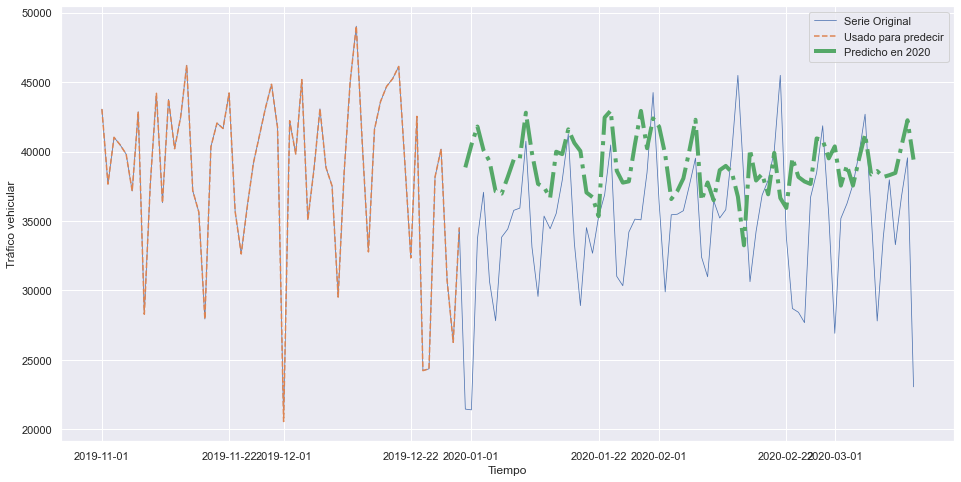

In [107]:
#visualización de los valores predichos
print(pred_2020)

#Gráfico de los resultados reales versus las predicciones
plt.figure(figsize=(16,8))
plt.plot(senial3.index[:length_total], senial3[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial3.index[:N_train + look_back], senial3[:N_train + look_back],'--', label = 'Usado para predecir')
#plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial3.index[N_train+look_back: length_total], pred_2020,'-.', lw = 4, label = 'Predicho en 2020')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Tráfico vehicular')
plt.show()

En el gráfico anterior se aprecia cómo las predicciones (línea verde) tratan de seguir la serie de los datos reales, lo cual es un buen indicio de que el modelo utilizado logra predecir el tráfico vehicular de una forma aceptable.

En la siguiente línea validamos la presición de las predicciones respecto a los valores reales por medio de la métrica del **RMSE** con la cual se está evaluando el modelo, se espera que por lo menos el error sea similar al obtenido en los datos de validación durante el entrenamiento.

In [108]:
#Error en las predicciones de 2020
MSE = mean_squared_error(y_test, pred_2020)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 6410.932672706129


**CONCLUSIÓN SOBRE LAS PREDICCIONES**

En las líneas anteriores podemos apreciar cómo el modelo XGBoost adoptado logra predecir el tráfico vehicular para la estación Illia con pago en Efectivo durante el primer trimestre de 2020 con un error medio de 6.411 vehículos en sus predicciones, resultado que es muy bueno ya que el error de las predicciones del modelo en los datos de entrenamiento y de valición fueron de 3.229 y 5.683 vehículos respectivamente.

Estos resultados permiten inferir que no tenemos un modelo con sobre o sub ajuste y con el mismo podríamos hacernos a la idea de cómo hubiese sido este tipo de flujo vehicular si no estuvieramos en el panorama de pandemia actual.

### 3. Opcional
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? 
Una forma en la que incorporaría el tipo de vehículo, forma de pago o sentído sería haciedo un filtro de la base de datos con la cual trabajaría la serie de datos, así como se filtró la forma de pago en efectivo. El día de la semana se incorpora por medio de los resampleos, por ejemplo, la serie que acabamos de trabajar al ser una serie diaria, tiene incluído el día de la semana.

1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
Si se compara la serie de tiempo de distintas estaciones consrvando las condiciones de la anterior serie de datos, se espera que tengan coportamientos similares toda vez que la forma de pago en general tiene un comportamiento decreciente. En cuanto a la estacionalidad se tendrían que calcular las componentes ya que el flujo vehicular si vimos en el análisis exploratorio que es muy diferente entre algunas estaciones.

1. **¿Hay algo que te gustaría investigar o probar?**
Algo que me gustaría mejorar y queda para el próximo proyecto, es incluir un poco más de información a la serie de tiempo y utilizar algunos modelos especialiados en series de tiempo. De igual manera, será muy bueno investigar o simular cómo hubiese sido el comportamiento del flujo vehicular pero ya no mediante la técnica de Direct Multi-step Forecast Strategy sino mediante una técnica de Recursive Multi-step Forecast (ver: https://machinelearningmastery.com/multi-step-time-series-forecasting/).

Adicionalmente, para el proyecto 4 me gustaría probar otras técnicas para análisis de tiempo como ARIMA y PROPHET con los cuales, una vez implementados con la técnica recursive multi step forecast, además de obtener modelos con pronósticos más acertados a la realidad se espera **se espera obtener la serie de tiempo para el tráfico vehicular en la estación Illia durante el 2020 bajo un escenario de normalidad (sin pandemia)** para responder el interrogante: ¿la tendencia decreciente del flujo de vehículos con pago en efectivo continuaría cayendo o se habría estabilizado? Y pof último, se espera aplicar también el modelo para pronosticar el flujo de vehículos con pago en efectivo durante el 2020 en la estación Avellaneda, pues en los datos históricos tiene un flujo vehicular más llamativo que el de la estavión Illia.

### Enlace a GitHub

El presente notebook, desarrollado por Julián Arley Chaverra se encuentra diponible para consulta pública en el siguiente repositorio de GitHub:
https://github.com/julianchaver/Acamica.git

# PROYECTO 4

## APLICACIÓN DE PROPHET Y ARIMA

En este último y cuarto proyecto retomaremos la serie de tiempo del flujo vehícular con pago en efectivo en la estación Illia para responder la pregunta `¿la tendencia decreciente del flujo de vehículos con pago en efectivo continuaría cayendo o se habría estabilizado bajo un escenario de normalidad (sin pandemia)?`

## Modelo PROPHET

En primera instancia vamos a entrenar un modelo y a realizar las predicciones del primer trimestre de 2020 con Prophet.

A continuación se importa el módulo Prophet luego de haber instalado las librerías necesarias en el ambiente de trabajo.

In [110]:
#Ya teniendo instalado previamente pystan, una dependencia requerida por Prophet,
#se procede a la instalación de Prophet en el ambiente de trabajo con el comando pip install prophet

from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


Se crea el modelo prof

In [172]:
#creamos un modelo de prophet y lo entrenamos con los datos de 2017-2019 (senial)
prof= Prophet()

De nuevo utilizaremos la serie de 2017 a 2019 para entrenar el modelo. A continuación se define de nuevo la serie para alimentar el modelo y entrenarlo

In [173]:
#Configuración de la serie en un dataframe de acuerdo a la exigencia de Prophet
senial.index=diario.fecha
senial_prof= pd.DataFrame(senial,columns=['fecha','cantidad_pasos'])
senial_prof['fecha']=senial_prof.index
pd.to_datetime(senial_prof.fecha)
senial_prof.reset_index(drop=True,inplace=True)
senial_prof.rename(columns={'fecha':'ds','cantidad_pasos':'y'},inplace=True)  #particularmente Prophet requiere que las columnas tengan estos nombres
senial_prof.head()

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0


In [174]:
#entrenamiento del modelo
prof.fit(senial_prof)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Hasta este punto ya se tiene entrenado el modelo y es sorprendente ya que la información para su entrenamiento se entrega mediante un dataframe.

A continuación crearemos los periodos que queremos que el modelo nos pronostique. Se puede proceder de dos maneras, una, por medio de una dataframe en el cual tengamos los periodos a predecir, por ejemplo: el dataframe con la información de 2020; la segunda opción y más ágil, es solicitarle a Prophet crear los periodos requeridos como se muestra a continuación:

In [175]:
#Creamos las fechas a pronosticar para el primer trimestre de 2020 y le indicamos que no incluya los datos históricos
prof_2020=prof.make_future_dataframe(periods=75)
prof_2020.head()

,ds
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05


Ahora le indicamos a Prophet que pronostique el flujo vehicular con pago en efectrivo en la estacion Illia para el primer trimestre de 2020

In [176]:
#predecimos el primer trimestre de 2020
prof_cast=prof.predict(prof_2020)
prof_cast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1165,2020-03-11,39197.961650,33071.106307,45300.439775
1166,2020-03-12,40457.934991,34523.600657,46276.120069
1167,2020-03-13,42485.482514,35793.468691,48511.587595
1168,2020-03-14,34781.212191,28425.100235,40721.026251
1169,2020-03-15,30262.280387,24255.970422,36140.440485


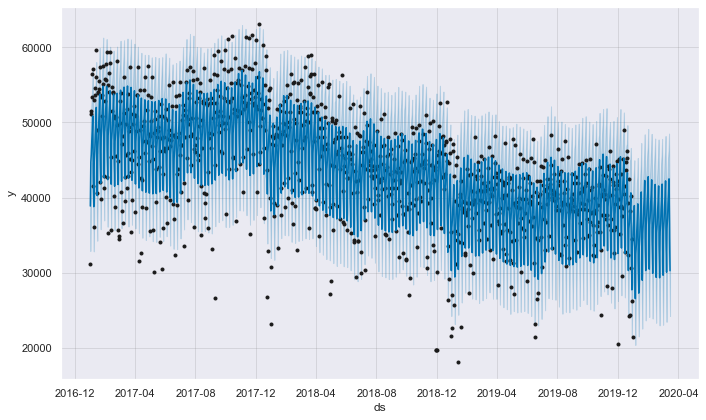

In [177]:
#se grafica la serie entrenada y las predicciones del primer trimestre de 2020
fig1 = prof.plot(prof_cast)

Si se revisa el comportamiento de la serie en el proyecto 3, podemos hacernos a la idea de que los valores pronosticados siguen la tendencia de los valores reales para el primer trimestre de 2020.

En los siguientes gráficos, podemos observar las componentes del modelo, en el cual también se aprecia una tendencia decreciente y la estacionalidad tanto de manera anual como semanal, para esta última, con prophet también se aprecia que los días viernes son los de mayor tráfico.

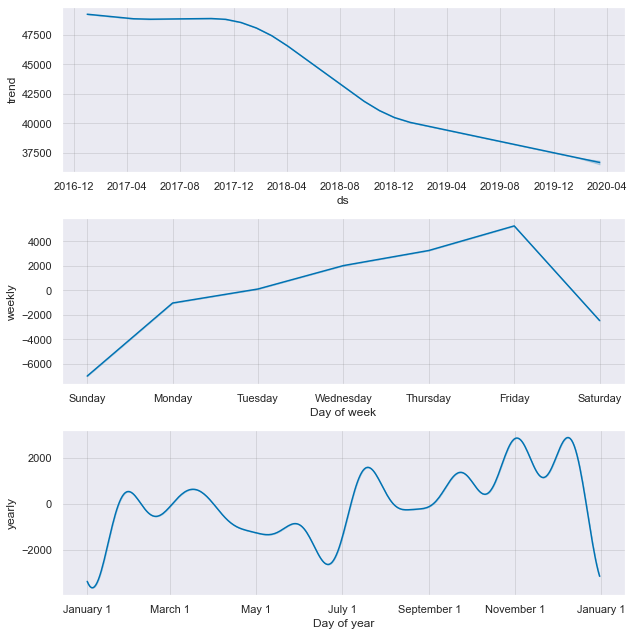

In [179]:
#A continuación analizamos las componentes de la serie con prophet
fig=prof.plot_components(prof_cast)

Por último vamos a calular el error RMSE del modelo para determinar que tan buenos son los pronósticos de este modelo. Para esto, comparamos las predicciones con los datos reales del primer trimestre de 2020 el cual lo tenemos compilado en la variable y_test.

El error en la predicción del primer trimestre es de 5855 vehículos aproximadamente, el cual frente al error de 6.420 vehículos obtenido en las predicciones con el mejor modelo (XGBoost) del modelo 3, el modelo Prophet muestra ser un poco más eficiente.

In [184]:
#Error en las predicciones de 2020 con prophet. Comparamos los resultados del modelo vs los datos reales del primer trimestre
MSE = mean_squared_error(y_test, prof_cast['yhat'].tail(75))
print('Error en Test:',np.sqrt(MSE))

Error en Test: 5855.191514455055


## MODELO ARIMA

A continuación haremos un ejercicio similar al anterior pero aplicando ARIMA.

Lo primer es preparar nuevamente la serie de datos para el entremiento del modelo, ya que ARIMA no recibe los datos en el mismo formato de Prophet y se importan las librerías requeridas para ARIMA

In [200]:
#Preparación de los datos de la serie para el modelo arima
senial_ar=senial_prof.y
senial_ar.index=senial_prof.ds
senial_ar

ds
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    21447.0
Name: y, Length: 1095, dtype: float64

In [185]:
#Se importan las librerías requeridas para el modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

A continuación se define el objeto (modelo) arima con el modelo requerido. Una particularidad de este modelo, es que desde la creación del objeto se entrega al modelo los datos de entrenamiento y en el entrenamiento no se requieren ingresar parámetros a las función `.fit`

In [201]:
arima= ARIMA(senial_ar, order=(5,1,0))

C:\Users\JCHAVERR\Anaconda3\envs\acamica\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\JCHAVERR\Anaconda3\envs\acamica\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provi

A continuación entrenamos el modelo y se imprime un resumen del mismo en el cual se puede apreciar los valores de los coeficientes utilizados y la técnica de ajuste para las observaciones de la muestra

In [214]:
#Entrenamiento del modelo ARIMA
arima.fit()
arima_fit=arima.fit()
print(arima_fit.summary())

C:\Users\JCHAVERR\Anaconda3\envs\acamica\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1094
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11043.600
Method:                       css-mle   S.D. of innovations           5855.104
Date:                Sun, 12 Sep 2021   AIC                          22101.201
Time:                        17:59:04   BIC                          22136.184
Sample:                    01-02-2017   HQIC                         22114.439
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.6211     53.700     -0.291      0.771    -120.871      89.628
ar.L1.D.y     -0.4876      0.028    -17.485      0.000      -0.542      -0.433
ar.L2.D.y     -0.5348      0.029    -18.527      0.0

En los siguientes gráficos se aprecia la dristibución y la serie de los errores. La primera gráfica corresponde a la serie de los errores la cual no tiene tendencias apreciables por lo cual se podría pensar que le modelo ya tiene la información de tendencia requerdida.

El segundo gráfico muestra como los errores no se distribuyen del todo al rededor de cero, por lo cual, en el modelo aún hay sesgo en las predicciones realizadas y ello se puede apreciar en el resumen que se imprime bajo la gráfica gausiana

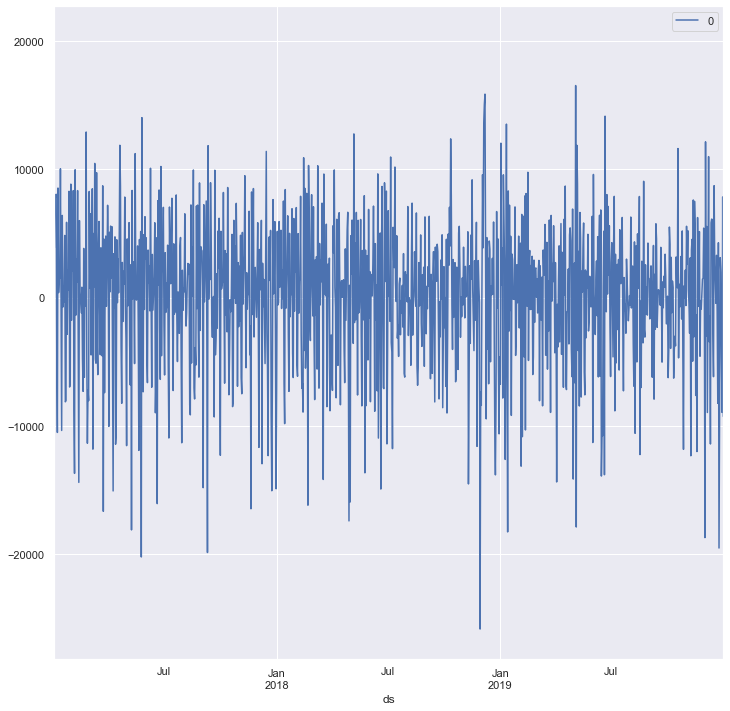

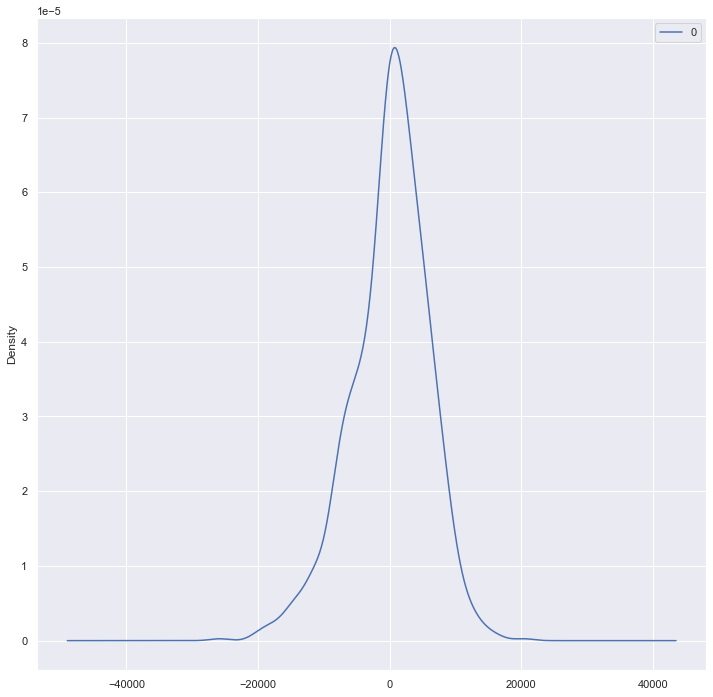

                  0
count   1094.000000
mean      29.276476
std     5872.254348
min   -25853.911921
25%    -3169.733251
50%      559.108970
75%     3883.343490
max    20400.621109


In [215]:
# plot residual errors
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Predicción del primer trimestre de 2020 aplicando el modelo ARIMA. Nuevamente este modelo presenta la facilidad de que sólo se requiere indicarle cuántas observaciones se quieren pronosticar particiendo de la última fecha entregada en el entrenamiento del modelo.

In [205]:
#Prediccion con ARIMA del primer trimestre de 2020
arima_pred=arima_fit.forecast(75)

A continuación se determina el error RMSE de la predicción con el modelo ARIMA, para el cual al igual que con Prophet, comparamos los resultados de las predicciones con los datos reales del primer trimestre de 2020.

Se encuentra que con ARIMA el error en los pronósticos es de 7.542 vehículos aproximadamente.

In [203]:
from sklearn.metrics import mean_squared_error

In [212]:
MSE = mean_squared_error(y_test, arima_pred[0])
print('Error en Test:',np.sqrt(MSE))

Error en Test: 7541.651096250558


En conclusión, Prophet es el mejor modelo en la predicción del primer trimestre de 2020 con un RMSE de 5.855 vehículos aproximadamente, seguido del modelo XGBoost optimizado en el proyecto 3 con un RMSE de 6.420 vehículos y luego estaría el modelo ARIMA con un RMSE de 7.542 vehículos en la predicción del flujo vehicular durante el primer trimestre de 2020.

### Pronosticando el 2020 con Prophet

Partiendo de los resultados del RMSE para los modelos evaluados anteriormente, vamos a utilizar Prophet para pronosticar el flujo de vehículos con pago en efectivo por la estación Illia para hacernos una idea de cómo hubiese sido el comportamiento bajo un escenario de normalidad o sin pandemia.

En primer lugar, reentrenaremos el modelo con los datos que tenemos bajo el escenario de normalidad (hasta marzo 15 de 2020) y luego se pronosticarán los otros días.

In [216]:
# Serie real para el entrenamiento del modelo
modelo = Prophet()

In [221]:
#Datos recolectados de la serie
senial3= pd.concat([senial,senial2],ignore_index=False)
inicio, final = '2017-01-01','2020-03-15'  #Periodos a filtrar
senial3= senial3.loc[inicio:final]   #Localización de los periodos a filtrar
senial3

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2020-03-11    33290.0
2020-03-12    36730.0
2020-03-13    39548.0
2020-03-14    23052.0
2020-03-15    18390.0
Name: cantidad_pasos, Length: 1170, dtype: float64

In [224]:
data_serie= pd.DataFrame(senial3,columns=['fecha','cantidad_pasos'])
#senial.index=diario.fecha
#senial_prof= pd.DataFrame(senial,columns=['fecha','cantidad_pasos'])
data_serie['fecha']=data_serie.index
pd.to_datetime(data_serie.fecha)
data_serie.reset_index(drop=True,inplace=True)
data_serie.rename(columns={'fecha':'ds','cantidad_pasos':'y'},inplace=True)  #particularmente Prophet requiere que las columnas tengan estos nombres
data_serie.tail()

,ds,y
1165,2020-03-11,33290.0
1166,2020-03-12,36730.0
1167,2020-03-13,39548.0
1168,2020-03-14,23052.0
1169,2020-03-15,18390.0


A continuación entrenamos el nuevo modelo de Prophet con los datos hasta el 15 de marzo de 2020

In [226]:
#entrenamiento del modelo
modelo.fit(data_serie)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


En la siguiente línea le indicamos a Prophet crear los datos para el resto del 2020 para el pronóstico del flujo vehicular.

In [230]:
#Creamos las fechas a pronosticar para el primer trimestre de 2020 y le indicamos que no incluya los datos históricos
pronostico=modelo.make_future_dataframe(periods=290)
pronostico.tail()

,ds
1455,2020-12-26
1456,2020-12-27
1457,2020-12-28
1458,2020-12-29
1459,2020-12-30


A continuación una muestra de los pronósticos realizados por el modelo hasta el 30 de diciembre de 2020, la columna yhat es el valor predicho. Y en la gráfica se muestra el resultado de los datos recolectados más los pronosticados.

In [232]:
#predecimos el primer trimestre de 2020
proponostico_cast=modelo.predict(pronostico)
proponostico_cast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1455,2020-12-26,28249.162386,22409.364911,34358.167529
1456,2020-12-27,23354.529647,16468.654344,30206.355272
1457,2020-12-28,28996.330052,22458.465085,35075.277146
1458,2020-12-29,29809.187613,23393.048413,35872.266242
1459,2020-12-30,31337.536521,25586.032959,37505.176320


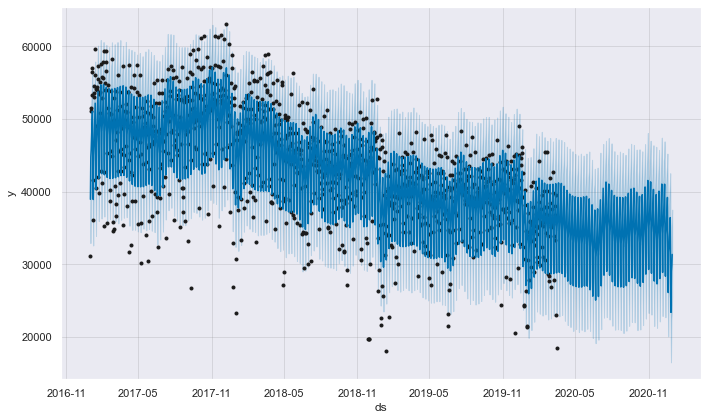

In [233]:
#se grafica la serie entrenada y las predicciones del primer trimestre de 2020
fig1 = modelo.plot(proponostico_cast)

Del gráfico podríamos dar una respuesta aproximada a nuestro interrogante principal, y al parecer, se observa una estabilización en la tendencia decreciente que tenía el flujo vehicular con pago en efectivo por la estación Illia. Pero el siguiente gráfico de la tendenia nos lo confirmará.

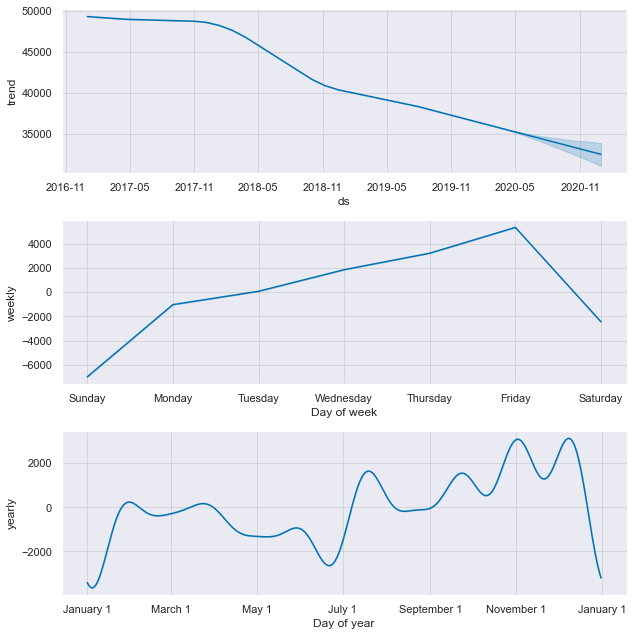

In [234]:
#A continuación analizamos las componentes de la serie con prophet
fig=modelo.plot_components(proponostico_cast)

## CONCLUSIÓN

De acuerdo al primer gráfico de los proyectados en la línea anterior, la tendencia decrecriente del flujo vehicular con pago en efectivo por la estación Illia hubiese continuado en descenso, lo cual tiene sentido ya que de haber continuado el normal desarrollo de la economía, posiblemente se hubiese continuado promocionando el medio de pago Telepase que en el análisis exploratorio observamos que tenía un comportemiento creciente mientras que el pago en efectivo decrecía.